<h1 style="color:brown;">1. INTRODUCTION</h1>


The Traveling Salesman Problem is a classic optimization problem that challenges one to find the shortest possible route that visits a set of cities exactly once and returns to the origin city. In this experiment, a Genetic Algorithm was applied to tackle this problem and the aim was to enhance its performance through systematic exploration of various parameters and methods. The given TSP problem included 200 cities; however, initially, the experiments were conducted using a subset of the first 50 cities to establish a baseline and refine the GA’s parameters and methods. In the final experiment, the optimal GA configurations were applied to the complete TSP set.

<h1 style="color:brown;">2. IMPORTING LIBRARIES</h1>


In [1]:
# Importing necessary libraries
from deap import base  # Importing the base module for evolutionary algorithms
from deap import creator  # Importing the creator module to define problem-specific fitness functions and individuals
from deap import tools  # Importing the tools module for evolutionary algorithms operators
from deap import algorithms  # Importing the algorithms module for predefined evolutionary algorithm implementations
import csv  # Importing the CSV module for reading CSV file
import array  # Importing the array module for creating array objects
import random  # Importing the random module for generating random numbers
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualizations
import seaborn as sns  # Importing seaborn for data visualization

<h1 style="color:brown;">3. DEFINING THE TRAVELING SALESMAN PROBLEM CLASS</h1>


In [2]:
class TravelingSalesmanProblem:
    """
    This class handles the Traveling Salesman Problem (TSP).
    It reads city coordinates from a file, calculates the distance matrix,
    and allows for the calculation of total distance for a given path.
    Additionally, it can plot the path.

    Parameter:
    name (str): The name of the TSPLIB problem file, e.g. 'burma14' or 'bayg29'.
    """

    def __init__(self, name):
        """
        Initializes an instance of the TSP.

        Parameter:
        name (str): The name of the TSP problem.
        """
        self.name = name  # Storing the name of the TSP problem
        self.locations = []  # Initializing a list to store city coordinates
        self.distances = []  # Initializing a matrix to store distances between citie
        self.tspSize = 0  # Initializing the number of cities

        # Initializing the data for the TSP
        self.__initData()

    def __len__(self):
        """
        Returns the number of cities in the TSP.

        Return:
        int: The number of cities.
        """
        return self.tspSize

    def __initData(self):
        """
        Reads the data by calling the method to prepare it.
        """
        self.__createData()  # Populating locations and distances
        self.tspSize = len(self.locations)  # Setting the number of cities

    def __createData(self):
        """
        Reads the TSP file, extracts city coordinates, and calculates the distances
        between each pair of cities to fill the distance matrix.
        """
        self.locations = []  # Initializing the locations list

        # Opening the TSP file and reading it line by line
        with open(self.name + ".tsp") as f:
            reader = csv.reader(f, delimiter=" ", skipinitialspace=True)

             # Skipping lines until reaching the section with coordinates
            for row in reader:
                if row[0] in ('DISPLAY_DATA_SECTION', 'NODE_COORD_SECTION'):
                    break

            # Reading the coordinates until the end of file (EOF) is found
            for row in reader:
                if row[0] != 'EOF':
                    del row[0]  # Removing the index at the beginning of the line
                    self.locations.append(np.asarray(row, dtype=np.float32))   # Adding coordinates to the locations list
                else:
                    break

            # Setting the number of cities
            self.tspSize = len(self.locations)
            print("Number of cities = {}, Locations = {}".format(self.tspSize, self.locations))

            # Initializing the distance matrix with zeros
            self.distances = [[0] * self.tspSize for _ in range(self.tspSize)]

            # Calculating and populating the distance matrix
            for i in range(self.tspSize):
                for j in range(i + 1, self.tspSize):
                    distance = np.linalg.norm(self.locations[j] - self.locations[i])  # Calculating Euclidean distance
                    self.distances[i][j] = distance  # Filling in the distance matrix
                    self.distances[j][i] = distance  # Ensuring symmetry
                    print("Distance from city {} to city {} = {}".format(i, j, distance))

    def getTotalDistance(self, indices):
        """
        Calculates the total distance of the path described by the given indices of the cities.

        Parameter:
        indices (list of int): A list of city indices describing the path.

        Return:
        float: The total distance of the path.
        """
        distance = self.distances[indices[-1]][indices[0]]  # Getting distance from the last city to the first city

        # Summing the distances between consecutive cities
        for i in range(len(indices) - 1):
            distance += self.distances[indices[i]][indices[i + 1]]

        return distance

    def plotData(self, indices):
        """
        Plots the path described by the given indices of the cities.

        Parameter:
        indices (list of int): A list of city indices describing the path.

        Return:
        matplotlib.pyplot: The resulting plot.
        """
        plt.scatter(*zip(*self.locations), marker='.', color='red')  # Plotting the cities as red dots

        # Creating a list of city locations in the order of the path
        locs = [self.locations[i] for i in indices]
        locs.append(locs[0])  # Closing the loop by adding the first city at the end

        # Plotting lines between consecutive cities in the path
        plt.plot(*zip(*locs), linestyle='-', color='blue')

        return plt  # Returning the plot


<h1 style="color:brown;">4. ARBITRARY INITIAL DESIGN</h1>


Before conducting any experiments, an initial design was implemented to establish a baseline for comparison. This initial design involved arbitrary choices for key parameters such as population size, crossover probability, mutation probability, and the number of generations. The purpose of this preliminary run was to ensure the correct implementation of the genetic algorithm and to provide a reference point for subsequent, more controlled experiments.

The arbitrary initial parameters were set as follows:

- **Population Size**: 50
- **Number of Generations**: 100
- **Crossover Probability**: 0.6
- **Mutation Probability**: 0.2

<h2 style="color:brown;">4.1 INITIALIZING THE TSP PROBLEM INSTANCE</h2>


In [3]:
# Defining the name of the TSP problem
TSP_NAME = "50_CITIES"  # Setting the name of the TSP problem to "50_CITIES"

# Creating an instance of the TravelingSalesmanProblem class with the specified name
tsp = TravelingSalesmanProblem(TSP_NAME) 

Number of cities = 50, Locations = [array([1.083879, 0.534726], dtype=float32), array([0.146797, 0.910582], dtype=float32), array([1.29368 , 1.177498], dtype=float32), array([0.658087, 0.577694], dtype=float32), array([0.878511, 0.261952], dtype=float32), array([0.665294, 0.174436], dtype=float32), array([0.511688, 0.361154], dtype=float32), array([0.166614, 1.334636], dtype=float32), array([0.470262, 0.727979], dtype=float32), array([0.279573, 1.074684], dtype=float32), array([0.863384, 0.868929], dtype=float32), array([0.722891, 0.437054], dtype=float32), array([0.862636, 1.318101], dtype=float32), array([0.174825, 1.025652], dtype=float32), array([1.115217, 0.712152], dtype=float32), array([1.002343, 0.428465], dtype=float32), array([0.555795, 1.333423], dtype=float32), array([0.698467, 1.019965], dtype=float32), array([0.61772 , 0.582407], dtype=float32), array([0.834183, 1.108248], dtype=float32), array([1.169078, 1.142261], dtype=float32), array([1.303985, 0.180227], dtype=float3

<h2 style="color:brown;">4.2 CONFIGURING GENETIC ALGORITHM PARAMETERS</h2>


In [4]:
# Defining the size of the population
POPULATION_SIZE = 50  

# Defining the size of the max generation
MAX_GENERATIONS = 100

# Defining the probability of crossover in the genetic algorithm
P_CROSSOVER = 0.6   # Setting the probability of applying crossover to 60%

# Defining the probability of mutation in the genetic algorithm
P_MUTATION = 0.2  # Setting the probability of applying mutation to 20%

# Defining the size of the Hall of Fame for storing the best individuals
HALL_OF_FAME_SIZE = 30 

<h2 style="color:brown;">4.3 SETTING UP THE DEAP TOOLBOX AND GENETIC ALGORITHM COMPONENTS</h2>


In [5]:
# Creating a fitness class that aims to minimize the fitness value
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) 

# Creating an individual class that uses the FitnessMin class and stores individuals as arrays of integers
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin) 

# Defining a function to calculate the total distance for a given individual (path)
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # Returning the total distance as a single-element tuple for compatibility with DEAP

# Setting up the toolbox for evolutionary algorithms
toolbox = base.Toolbox() 

# Registering a function to create a random permutation of city indices
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))  

# Registering a function to initialize an individual with a random order of citie
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)  

# Registering a function to create a population of individuals
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)  

# Registering a function to evaluate the fitness of individuals
toolbox.register("evaluate", tpsDistance) 

# Registering a function for selection using tournament selection with a tournament size of 10
toolbox.register("select", tools.selTournament, tournsize=10)  

# Registering a function for crossover using ordered crossover
toolbox.register("mate", tools.cxOrdered) 

# Registering a function for mutation using shuffle indexes
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))  

<h2 style="color:brown;">4.4 RUNNING THE ALGORITHM</h2>


In [6]:
# Setting up the statistics to be collected during the genetic algorithm run
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)  # Registering a function to find the minimum fitness value
stats.register("avg", np.mean) # Registering a function to calculate the average fitness value

# Creating a Hall of Fame to store the best individual found across runs
hof = tools.HallOfFame(1)

# Initializing lists to keep track of fitness values over all runs
all_min_fitness = []    # Initializing a list to store the minimum fitness values from each run
all_mean_fitness = []   # Initializing a list to store the average fitness values from each run

# Defining how many times we want to run the genetic algorithm
num_runs = 10
for run in range(num_runs):
    # Creating the initial population of individuals for this run
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    
    # Running the genetic algorithm to evolve the population over several generations
    population, logbook = algorithms.eaSimple(
        population,               # Starting with an initial population of individuals
        toolbox,                  # Using the toolbox containing the genetic operators (e.g., crossover, mutation)
        cxpb=P_CROSSOVER,         # Setting the probability of applying crossover
        mutpb=P_MUTATION,         # Setting the probability of applying mutation
        ngen=MAX_GENERATIONS,     # Specifying the number of generations to evolve the population
        stats=stats,              # Collecting statistics during the evolution process
        halloffame=hof,           # Storing the best individual found in the Hall of Fame
        verbose=False             # Suppressing detailed output during the run
    )
    
    # Identifying the best and worst individuals from the final population
    best_solution = tools.selBest(population, 1)[0]  # Selecting the individual with the best fitness
    worst_solution = tools.selWorst(population, 1)[0]  # Selecting the individual with the worst fitness

    # Retrieving fitness values from the logbook
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    all_min_fitness.append(minFitnessValues)    # Adding the minimum fitness values of this run to the list
    all_mean_fitness.append(meanFitnessValues)  # Adding the average fitness values of this run to the list
    
    # Printing the best fitness value found in this run
    print(f"Run {run + 1} done with best fitness: {hof[0].fitness.values[0]}")
    
    # Saving the results from the last run for later use
    if run == num_runs - 1:
        last_population = population        # Storing the final population of the last run
        last_best_solution = best_solution  # Storing the best solution from the last run
        last_worst_solution = worst_solution  # Storing the worst solution from the last run


Run 1 done with best fitness: 14.833207130432129
Run 2 done with best fitness: 14.833207130432129
Run 3 done with best fitness: 14.833207130432129
Run 4 done with best fitness: 14.833207130432129
Run 5 done with best fitness: 14.833207130432129
Run 6 done with best fitness: 12.63312816619873
Run 7 done with best fitness: 12.63312816619873
Run 8 done with best fitness: 12.63312816619873
Run 9 done with best fitness: 12.63312816619873
Run 10 done with best fitness: 12.63312816619873


<h2 style="color:brown;">4.5 PLOTTING THE BEST, WORST, AND RANDOM SOLUTIONS FROM THE LAST RUN</h2>


Best Solution Path: Individual('i', [40, 36, 9, 23, 7, 13, 39, 47, 19, 35, 16, 1, 41, 44, 6, 5, 11, 34, 26, 12, 20, 28, 21, 38, 42, 32, 14, 29, 27, 2, 17, 10, 46, 18, 25, 33, 30, 4, 49, 15, 43, 0, 37, 3, 31, 45, 22, 24, 48, 8])


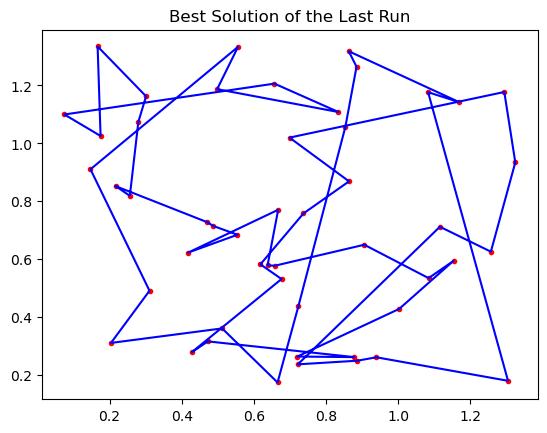

Worst Solution Path: Individual('i', [40, 36, 9, 23, 7, 13, 39, 47, 19, 35, 16, 1, 41, 44, 26, 5, 11, 34, 6, 12, 20, 28, 21, 38, 43, 32, 14, 29, 27, 2, 17, 10, 46, 18, 25, 33, 30, 4, 49, 15, 42, 0, 37, 3, 31, 45, 22, 24, 48, 8])


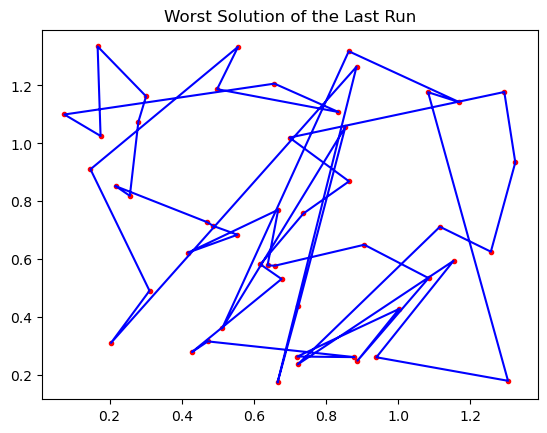

Random Solution Path: Individual('i', [40, 36, 9, 23, 7, 13, 39, 47, 19, 35, 16, 1, 41, 44, 6, 5, 11, 34, 26, 12, 20, 28, 21, 38, 42, 32, 14, 29, 27, 2, 17, 45, 46, 18, 25, 33, 30, 4, 49, 15, 43, 0, 37, 3, 31, 10, 22, 24, 48, 8])


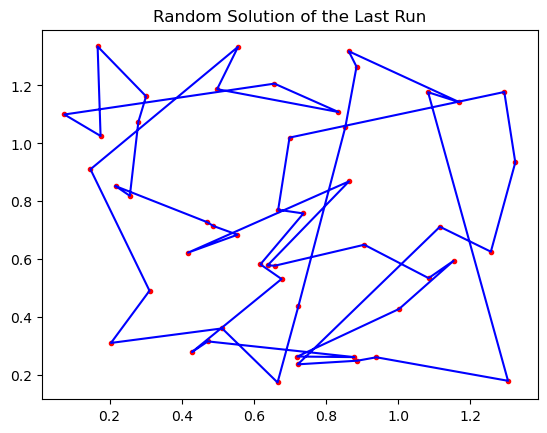

In [7]:
# Plotting the best solution of the last run
print("Best Solution Path:", last_best_solution)
plt.figure()
tsp.plotData(last_best_solution)
plt.title('Best Solution of the Last Run')
plt.show()

# Plotting the worst solution of the last run
print("Worst Solution Path:", last_worst_solution)
plt.figure()
tsp.plotData(last_worst_solution)
plt.title('Worst Solution of the Last Run')
plt.show()

# Plotting a random solution from the last population
random_solution = last_population[2]
print("Random Solution Path:", random_solution)
plt.figure()
tsp.plotData(random_solution)
plt.title('Random Solution of the Last Run')
plt.show()


<h2 style="color:brown;">4.6 PLOTTING AVERAGE MIN AND MEAN FITNESS OVER GENERATIONS</h2>


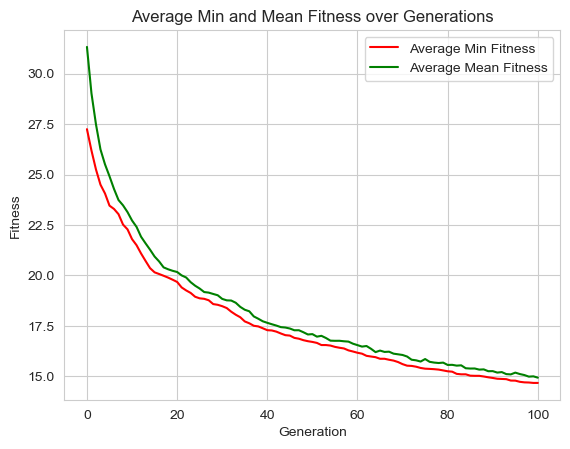

In [8]:
# Calculating the average min and mean fitness across all runs
avg_min_fitness = np.mean(all_min_fitness, axis=0)
avg_mean_fitness = np.mean(all_mean_fitness, axis=0)

# Plotting the average min and mean fitness over generations
plt.figure()
sns.set_style("whitegrid")
plt.plot(avg_min_fitness, color='red', label='Average Min Fitness')
plt.plot(avg_mean_fitness, color='green', label='Average Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Average Min and Mean Fitness over Generations')
plt.legend()
plt.show()

<h2 style="color:brown;">4.7 CONCLUSION FOR INITIAL EXPERIMENT</h2>


In the preliminary phase of the GA implementation, the results exhibited a clear and consistent pattern in fitness values. With arbitrary parameter settings (Population Size: 50, Number of Generations: 100, Crossover Probability: 0.6, Mutation Probability: 0.2), the GA consistently achieved a best fitness value of 14.833207130432129 across the first five runs. Interestingly, the last five runs demonstrated an improvement, achieving a best fitness value of 12.63312816619873. The results are summarized in the table below:


<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Run Number</th>
    <th style="border: 1px solid black; padding: 8px;">Best Fitness Value</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">1</td>
    <td style="border: 1px solid black; padding: 8px;">14.833207130432129</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">2</td>
    <td style="border: 1px solid black; padding: 8px;">14.833207130432129</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">3</td>
    <td style="border: 1px solid black; padding: 8px;">14.833207130432129</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">4</td>
    <td style="border: 1px solid black; padding: 8px;">14.833207130432129</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">5</td>
    <td style="border: 1px solid black; padding: 8px;">14.833207130432129</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">6</td>
    <td style="border: 1px solid black; padding: 8px;">12.63312816619873</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">7</td>
    <td style="border: 1px solid black; padding: 8px;">12.63312816619873</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">8</td>
    <td style="border: 1px solid black; padding: 8px;">12.63312816619873</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">9</td>
    <td style="border: 1px solid black; padding: 8px;">12.63312816619873</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">10</td>
    <td style="border: 1px solid black; padding: 8px;">12.63312816619873</td>
  </tr>
</table>



This consistency across multiple runs confirms that the GA is functioning correctly with the given parameters, providing a reliable baseline for future optimization efforts.

<h1 style="color:brown;">5. EXPERIMENTS</h1>


<h2 style="color:brown;">5.1 FIRST EXPERIMENT</h2>


After establishing a baseline through an initial design, the first experiment was conducted. In this experiment:

- The population size and the number of generations were varied to determine the best combination for the problem.
- Each combination of parameters was run 10 times to ensure robust results and to account for the stochastic nature of GAs.
- The combination of population size and maximum generations that yielded the best fitness value was identified.
- For the best combination, the best, worst, and a random solution were visualized. Additionally, the average minimum and mean fitness values over generations were plotted.

The following parameters were experimented with:

- **Population Sizes**: 50, 100, 150
- **Maximum Generations**: 100, 200, 500

<h3 style="color:brown;">5.1.1 CONFIGURING GENETIC ALGORITHM PARAMETERS</h3>


In [9]:
# Defining the size of the population for the genetic algorithm
population_sizes = [50, 100, 150]
max_generations = [100, 200, 500]

# Defining the size of the Hall of Fame for storing the best individuals
HALL_OF_FAME_SIZE = 30  # Setting the number of top individuals to keep in the Hall of Fame to 30

# Defining the probability of crossover in the genetic algorithm
P_CROSSOVER = 0.6  # Setting the probability of applying crossover to 60%

# Defining the probability of mutation in the genetic algorithm
P_MUTATION = 0.2  # Setting the probability of applying mutation to 20%

<h3 style="color:brown;">5.1.2 RUNNING THE ALGORITHM</h3>


In [10]:
# Preparing the statistics object to collect fitness values
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)  # Registering a function to compute the minimum fitness value
stats.register("avg", np.mean) # Registering a function to compute the average fitness value

# Creating a Hall of Fame to store the best individual found across runs
hof = tools.HallOfFame(1)

# Initializing variables to keep track of the best results
best_combination = None
best_fitness = float('inf')  # Starting with an infinitely large value for best fitness
best_population = None
best_logbook = None
best_best_solution = None
best_worst_solution = None

# Iterating over different population sizes and maximum generations
for POPULATION_SIZE in population_sizes:
    for MAX_GENERATIONS in max_generations:
        # Printing the current settings for population size and maximum generations
        print(f"Running with Population Size: {POPULATION_SIZE} and Max Generations: {MAX_GENERATIONS}")
        
        # Initializing lists to collect fitness values for this combination
        all_min_fitness = []
        all_mean_fitness = []

        num_runs = 10  # Defining the number of runs for each combination
        for run in range(num_runs):
            # Creating the initial population for this run
            population = toolbox.populationCreator(n=POPULATION_SIZE)
            
            # Running the genetic algorithm to evolve the population
            population, logbook = algorithms.eaSimple(
                population,               # Starting with an initial population
                toolbox,                  # Using the toolbox with genetic operators
                cxpb=P_CROSSOVER,         # Setting crossover probability
                mutpb=P_MUTATION,         # Setting mutation probability
                ngen=MAX_GENERATIONS,     # Specifying the number of generations
                stats=stats,              # Collecting statistics during the evolution
                halloffame=hof,           # Storing the best individual found
                verbose=False             # Suppressing detailed output
            )
            
            # Selecting the best and worst individuals from the final population
            best_solution = tools.selBest(population, 1)[0]  # Selecting the individual with the best fitness
            worst_solution = tools.selWorst(population, 1)[0]  # Selecting the individual with the worst fitness

            # Collecting statistics from the logbook
            minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
            all_min_fitness.append(minFitnessValues)    # Adding minimum fitness values to the list
            all_mean_fitness.append(meanFitnessValues)  # Adding average fitness values to the list
            
            # Printing the best fitness value for this run
            print(f"Run {run + 1} done with best fitness: {hof[0].fitness.values[0]}")
            
            # Checking if the best fitness from this run is the best so far
            if hof[0].fitness.values[0] < best_fitness:
                # Updating the best results with this run's data
                best_fitness = hof[0].fitness.values[0]
                best_combination = (POPULATION_SIZE, MAX_GENERATIONS)
                best_population = population
                best_logbook = logbook
                best_best_solution = best_solution
                best_worst_solution = worst_solution

Running with Population Size: 50 and Max Generations: 100
Run 1 done with best fitness: 14.876614570617676
Run 2 done with best fitness: 14.876614570617676
Run 3 done with best fitness: 13.23644733428955
Run 4 done with best fitness: 13.23644733428955
Run 5 done with best fitness: 13.23644733428955
Run 6 done with best fitness: 13.23644733428955
Run 7 done with best fitness: 13.23644733428955
Run 8 done with best fitness: 13.23644733428955
Run 9 done with best fitness: 13.23644733428955
Run 10 done with best fitness: 13.23644733428955
Running with Population Size: 50 and Max Generations: 200
Run 1 done with best fitness: 12.991909980773926
Run 2 done with best fitness: 12.922948837280273
Run 3 done with best fitness: 12.922948837280273
Run 4 done with best fitness: 12.719043731689453
Run 5 done with best fitness: 12.719043731689453
Run 6 done with best fitness: 12.719043731689453
Run 7 done with best fitness: 12.719043731689453
Run 8 done with best fitness: 12.719043731689453
Run 9 don

<h3 style="color:brown;">5.1.3 BEST COMBINATION</h3>


In [11]:
# Displaying the best combination
print(f"Best Combination: Population Size = {best_combination[0]}, Max Generations = {best_combination[1]} with Best Fitness = {best_fitness}")

Best Combination: Population Size = 150, Max Generations = 500 with Best Fitness = 8.99872875213623


<h3 style="color:brown;">5.1.4 PLOTTING THE BEST, WORST, AND RANDOM SOLUTIONS</h3>


Best Solution Path: Individual('i', [22, 18, 31, 3, 25, 37, 14, 27, 2, 20, 28, 47, 9, 23, 35, 17, 45, 46, 11, 42, 38, 21, 29, 43, 0, 15, 4, 49, 32, 5, 6, 30, 33, 44, 41, 36, 40, 1, 13, 39, 7, 16, 12, 26, 19, 34, 10, 24, 48, 8])


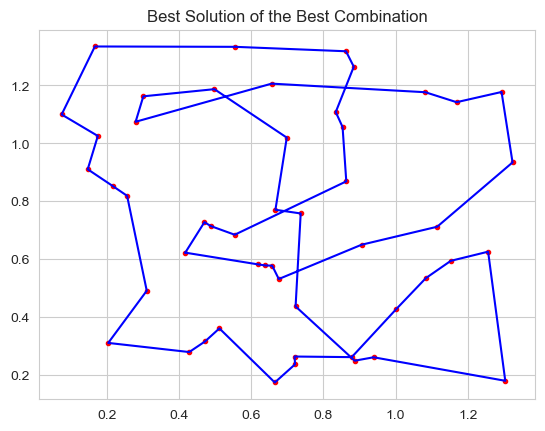

Worst Solution Path: Individual('i', [22, 18, 31, 3, 25, 37, 14, 27, 2, 20, 28, 47, 9, 23, 35, 17, 45, 46, 11, 42, 8, 21, 29, 43, 0, 15, 4, 49, 32, 16, 6, 30, 33, 44, 41, 36, 40, 1, 13, 39, 7, 5, 12, 26, 19, 34, 10, 24, 48, 38])


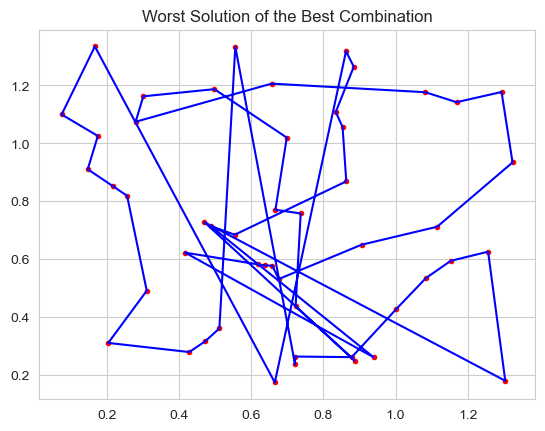

Random Solution Path: Individual('i', [22, 18, 23, 3, 25, 37, 14, 27, 2, 20, 28, 47, 9, 31, 35, 17, 45, 46, 11, 42, 38, 21, 29, 43, 0, 15, 4, 49, 32, 5, 6, 30, 33, 44, 41, 36, 40, 1, 13, 39, 7, 16, 12, 26, 19, 34, 10, 24, 48, 8])


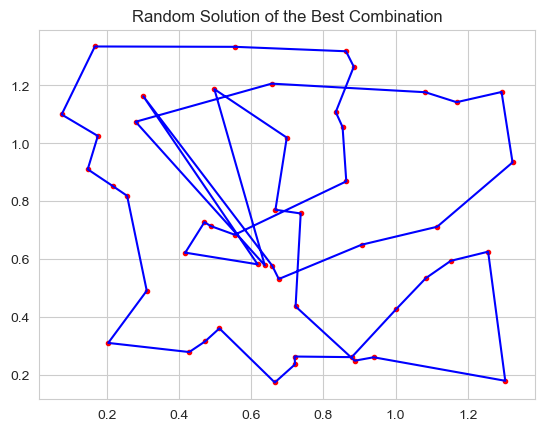

In [12]:
# Plotting the best solution of the best combination
print("Best Solution Path:", best_best_solution)
plt.figure()
tsp.plotData(best_best_solution)
plt.title('Best Solution of the Best Combination')
plt.show()

# Plotting the worst solution of the best combination
print("Worst Solution Path:", best_worst_solution)
plt.figure()
tsp.plotData(best_worst_solution)
plt.title('Worst Solution of the Best Combination')
plt.show()

# Plotting a random solution from the best population
random_solution = best_population[2]
print("Random Solution Path:", random_solution)
plt.figure()
tsp.plotData(random_solution)
plt.title('Random Solution of the Best Combination')
plt.show()

<h3 style="color:brown;">5.1.5 PLOTTING AVERAGE MIN AND MEAN FITNESS OVER GENERATIONS</h3>


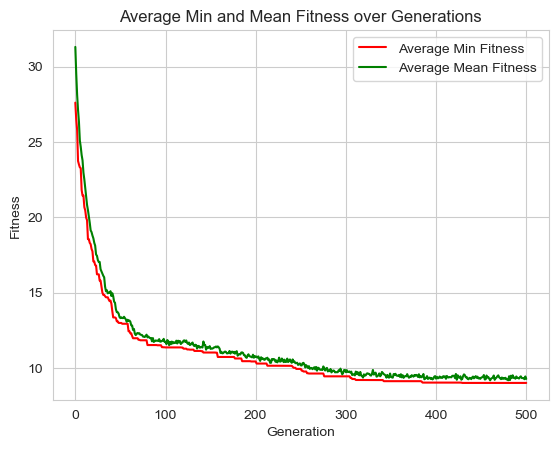

In [13]:
# Extracting min and mean fitness values from the best logbook
minFitnessValues, meanFitnessValues = best_logbook.select("min", "avg")

# Plotting the average min and mean fitness over generations for the best selection method
plt.figure()
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red', label='Average Min Fitness')
plt.plot(meanFitnessValues, color='green', label='Average Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Average Min and Mean Fitness over Generations')
plt.legend()
plt.show()

<h3 style="color:brown;">5.1.6 CONCLUSION FOR FIRST EXPERIMENT</h3>


In Experiment 1, various combinations of population sizes and maximum generations were tested to enhance the performance of the GA. The results are summarized in the table below:

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Population Size</th>
    <th style="border: 1px solid black; padding: 8px;">Max Generations</th>
    <th style="border: 1px solid black; padding: 8px;">Best Fitness (Run 10)</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">50</td>
    <td style="border: 1px solid black; padding: 8px;">100</td>
    <td style="border: 1px solid black; padding: 8px;">13.23644733428955</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">50</td>
    <td style="border: 1px solid black; padding: 8px;">200</td>
    <td style="border: 1px solid black; padding: 8px;">12.548589706420898</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">50</td>
    <td style="border: 1px solid black; padding: 8px;">500</td>
    <td style="border: 1px solid black; padding: 8px;">11.076168060302734</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">100</td>
    <td style="border: 1px solid black; padding: 8px;">100</td>
    <td style="border: 1px solid black; padding: 8px;">11.076168060302734</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">100</td>
    <td style="border: 1px solid black; padding: 8px;">200</td>
    <td style="border: 1px solid black; padding: 8px;">10.714691162109375</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">100</td>
    <td style="border: 1px solid black; padding: 8px;">500</td>
    <td style="border: 1px solid black; padding: 8px;">9.49093246459961</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">150</td>
    <td style="border: 1px solid black; padding: 8px;">100</td>
    <td style="border: 1px solid black; padding: 8px;">9.49093246459961</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">150</td>
    <td style="border: 1px solid black; padding: 8px;">200</td>
    <td style="border: 1px solid black; padding: 8px;">9.49093246459961</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">150</td>
    <td style="border: 1px solid black; padding: 8px;">500</td>
    <td style="border: 1px solid black; padding: 8px;">8.99872875213623</td>
  </tr>
</table>


The optimal configuration was found to be a population size of 150 and a maximum of 500 generations. This setup resulted in a best fitness value of 8.99872875213623, marking a substantial improvement compared to an earlier arbitrary experiment, where the best fitness value was 12.63312816619873. This reflects an approximate improvement of 28.76%, demonstrating that these parameters significantly enhanced the GA's ability to find shorter and more optimal routes for the TSP.

<h2 style="color:brown;">5.2 SECOND EXPERIMENT</h2>


Building upon the findings of the first experiment, which identified the optimal population size and maximum generations, a second experiment was conducted. In this experiment:

- The impact of different crossover and mutation probabilities on the algorithm’s performance was investigated. 
- Each combination of crossover and mutation probabilities was tested 10 times to ensure reliable results and to account for variability.
- The combination of crossover and mutation probabilities that yielded the best fitness value was identified.
- For the best combination, the best, worst, and a random solution were visualized. Additionally, the average minimum and mean fitness values over generations were plotted.

The following parameters were varied in the experiments:

- **Crossover Probabilities**: 0.6, 0.7, 0.9
- **Mutation Probabilities**: 0.2, 0.3, 0.12 

<h3 style="color:brown;">5.2.1 CONFIGURING GENETIC ALGORITHM PARAMETERS</h3>


In [14]:
# Setting static parameters based on the best combination found
POPULATION_SIZE = 150  # Using the best population size found in the previous experiments
MAX_GENERATIONS = 500  # Using the best number of generations found in the previous experiments

# Defining experiment parameters for crossover and mutation probabilities
crossover_probabilities = [0.6, 0.7, 0.9]  # Listing different probabilities for applying crossover
mutation_probabilities = [0.2, 0.3, 0.1]   # Listing different probabilities for applying mutation

<h3 style="color:brown;">5.2.2 RUNNING THE ALGORITHM</h3>


In [15]:
# Iterating over different crossover and mutation probabilities
for cxpb in crossover_probabilities:
    for mutpb in mutation_probabilities:
        # Printing the current crossover and mutation probabilities being used
        print(f"Running with Crossover Probability: {cxpb} and Mutation Probability: {mutpb}")

        # Initializing lists to collect fitness values for this set of parameters
        all_min_fitness = []
        all_mean_fitness = []

        num_runs = 10  # Defining the number of runs for each combination of parameters
        for run in range(num_runs):
            # Creating the initial population of individuals for this run
            population = toolbox.populationCreator(n=POPULATION_SIZE)
            
            # Running the genetic algorithm with the current crossover and mutation probabilities
            population, logbook = algorithms.eaSimple(
                population,               # Starting with the initial population
                toolbox,                  # Using the toolbox containing genetic operations
                cxpb=cxpb,                # Setting the current crossover probability
                mutpb=mutpb,              # Setting the current mutation probability
                ngen=MAX_GENERATIONS,     # Setting the number of generations
                stats=stats,              # Collecting statistics during the evolution process
                halloffame=hof,           # Storing the best individual found
                verbose=False             # Suppressing detailed output
            )
            
            # Selecting the best and worst individuals from the final population
            best_solution = tools.selBest(population, 1)[0]  # Selecting the individual with the best fitness
            worst_solution = tools.selWorst(population, 1)[0]  # Selecting the individual with the worst fitness

            # Collecting statistics from the logbook
            minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
            all_min_fitness.append(minFitnessValues)    # Adding minimum fitness values to the list
            all_mean_fitness.append(meanFitnessValues)  # Adding average fitness values to the list
            
            # Printing the best fitness value achieved in this run
            print(f"Run {run + 1} done with best fitness: {hof[0].fitness.values[0]}")
            
            # Checking if the best fitness from this run is the best so far
            if hof[0].fitness.values[0] < best_fitness:
                # Updating the best results with this run's data
                best_fitness = hof[0].fitness.values[0]
                best_combination = (cxpb, mutpb)  # Storing the current crossover and mutation probabilities
                best_logbook = logbook
                best_best_solution = best_solution
                best_worst_solution = worst_solution

Running with Crossover Probability: 0.6 and Mutation Probability: 0.2
Run 1 done with best fitness: 8.99872875213623
Run 2 done with best fitness: 8.99872875213623
Run 3 done with best fitness: 8.99872875213623
Run 4 done with best fitness: 8.99872875213623
Run 5 done with best fitness: 8.99872875213623
Run 6 done with best fitness: 8.99872875213623
Run 7 done with best fitness: 8.99872875213623
Run 8 done with best fitness: 8.99872875213623
Run 9 done with best fitness: 8.99872875213623
Run 10 done with best fitness: 8.99872875213623
Running with Crossover Probability: 0.6 and Mutation Probability: 0.3
Run 1 done with best fitness: 8.99872875213623
Run 2 done with best fitness: 8.99872875213623
Run 3 done with best fitness: 8.99872875213623
Run 4 done with best fitness: 8.99872875213623
Run 5 done with best fitness: 8.99872875213623
Run 6 done with best fitness: 8.99872875213623
Run 7 done with best fitness: 8.99872875213623
Run 8 done with best fitness: 8.823661804199219
Run 9 done w

<h3 style="color:brown;">5.2.3 BEST COMBINATION</h3>


In [16]:
# Displaying the best combination
print(f"Best Combination: Crossover Probability = {best_combination[0]}, Mutation Probability = {best_combination[1]} with Best Fitness = {best_fitness}")

Best Combination: Crossover Probability = 0.9, Mutation Probability = 0.2 with Best Fitness = 8.47499942779541


<h3 style="color:brown;">5.2.4 PLOTTING THE BEST, WORST, AND RANDOM SOLUTIONS</h3>


Best Solution Path: Individual('i', [31, 3, 25, 11, 18, 24, 40, 1, 13, 9, 23, 7, 39, 36, 8, 48, 22, 41, 44, 33, 30, 6, 5, 32, 49, 4, 38, 42, 21, 15, 37, 10, 17, 35, 16, 47, 34, 19, 26, 12, 28, 20, 2, 27, 14, 29, 43, 0, 46, 45])


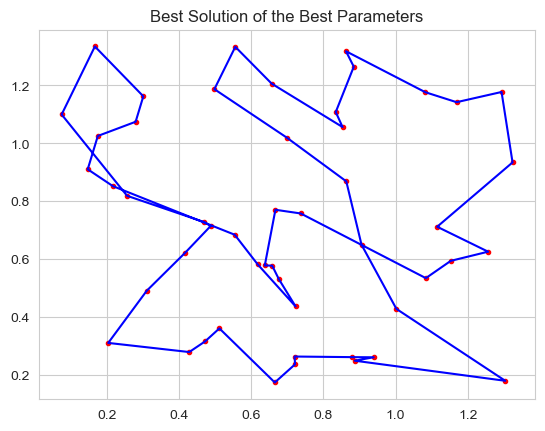

Worst Solution Path: Individual('i', [31, 3, 25, 11, 18, 24, 40, 15, 13, 9, 23, 7, 39, 36, 8, 48, 22, 41, 44, 33, 30, 29, 5, 32, 49, 16, 38, 42, 21, 1, 37, 10, 17, 35, 4, 47, 34, 19, 26, 28, 12, 20, 2, 27, 14, 6, 43, 0, 46, 45])


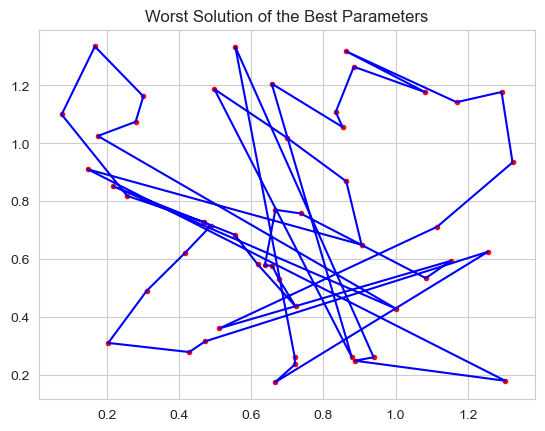

Random Solution Path: Individual('i', [22, 18, 23, 3, 25, 37, 14, 27, 2, 20, 28, 47, 9, 31, 35, 17, 45, 46, 11, 42, 38, 21, 29, 43, 0, 15, 4, 49, 32, 5, 6, 30, 33, 44, 41, 36, 40, 1, 13, 39, 7, 16, 12, 26, 19, 34, 10, 24, 48, 8])


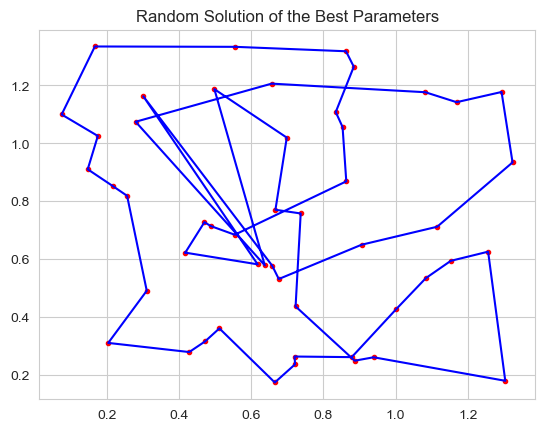

In [17]:
# Plotting the best solution of the best combination
print("Best Solution Path:", best_best_solution)
plt.figure()
tsp.plotData(best_best_solution)
plt.title('Best Solution of the Best Parameters')
plt.show()

# Plotting the worst solution of the best combination
print("Worst Solution Path:", best_worst_solution)
plt.figure()
tsp.plotData(best_worst_solution)
plt.title('Worst Solution of the Best Parameters')
plt.show()

# Plotting a random solution from the best population
random_solution = best_population[2]
print("Random Solution Path:", random_solution)
plt.figure()
tsp.plotData(random_solution)
plt.title('Random Solution of the Best Parameters')
plt.show()


<h3 style="color:brown;">5.2.4 PLOTTING THE BEST, WORST, AND RANDOM SOLUTIONS</h3>


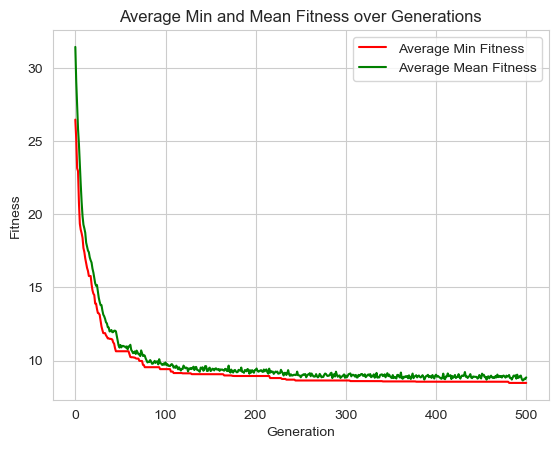

In [18]:
# Extracting min and mean fitness values from the best logbook
minFitnessValues, meanFitnessValues = best_logbook.select("min", "avg")

# Plotting the average min and mean fitness over generations for the best combination
plt.figure()
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red', label='Average Min Fitness')
plt.plot(meanFitnessValues, color='green', label='Average Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Average Min and Mean Fitness over Generations')
plt.legend()
plt.show()

<h3 style="color:brown;">5.2.6 CONCLUSION FOR SECOND EXPERIMENT</h3>


Building upon the findings from Experiment 1, which identified an optimal population size of 150 and 500 generations, Experiment 2 focused on fine-tuning the crossover and mutation parameters to further enhance the performance of the GA. The results are summarized in the table below:.

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Crossover Probability</th>
    <th style="border: 1px solid black; padding: 8px;">Mutation Probability</th>
    <th style="border: 1px solid black; padding: 8px;">Best Fitness (Run 10)</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.6</td>
    <td style="border: 1px solid black; padding: 8px;">0.2</td>
    <td style="border: 1px solid black; padding: 8px;">8.99872875213623</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.6</td>
    <td style="border: 1px solid black; padding: 8px;">0.3</td>
    <td style="border: 1px solid black; padding: 8px;">8.823661804199219</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.6</td>
    <td style="border: 1px solid black; padding: 8px;">0.1</td>
    <td style="border: 1px solid black; padding: 8px;">8.823661804199219</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.7</td>
    <td style="border: 1px solid black; padding: 8px;">0.2</td>
    <td style="border: 1px solid black; padding: 8px;">8.823661804199219</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.7</td>
    <td style="border: 1px solid black; padding: 8px;">0.3</td>
    <td style="border: 1px solid black; padding: 8px;">8.823661804199219</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.7</td>
    <td style="border: 1px solid black; padding: 8px;">0.1</td>
    <td style="border: 1px solid black; padding: 8px;">8.823661804199219</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.9</td>
    <td style="border: 1px solid black; padding: 8px;">0.2</td>
    <td style="border: 1px solid black; padding: 8px;">8.47499942779541</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.9</td>
    <td style="border: 1px solid black; padding: 8px;">0.3</td>
    <td style="border: 1px solid black; padding: 8px;">8.47499942779541</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">0.9</td>
    <td style="border: 1px solid black; padding: 8px;">0.1</td>
    <td style="border: 1px solid black; padding: 8px;">8.47499942779541</td>
  </tr>
</table>


The results revealed that the best combination of parameters was a crossover probability of 0.9 and a mutation probability of 0.2. This configuration significantly improved the GA's fitness, achieving a best fitness value of 8.47499942779541. Compared to the best fitness value of 8.99872875213623 achieved in Experiment 1, this represents an improvement of approximately 5.83%. This enhancement demonstrates a more effective exploration and exploitation of the search space, resulting in better optimization for the TSP.

<h2 style="color:brown;">5.3 THIRD EXPERIMENT</h2>


Following the insights gained from experimenting with population size, generations, and crossover and mutation probabilities, third experiment was conducted. In this experiment:

- The impact of different selection methods on the performance of the Genetic Algorithm was investigated.
- Each selection method was evaluated over 10 runs to ensure consistent and reliable results.
- The selection method that resulted in the best fitness value was identified.
- For the best selection method, the best, worst, and a random solution from the final population were visualized. Additionally, the average minimum and mean fitness values over generations were plotted.

The following selection methods were tested:

- **Tournament Selection**: Individuals compete in tournaments to be selected for reproduction.
- **Roulette Selection**: Individuals are selected based on a probability proportional to their fitness.
- **Best Selection**: The best individuals are always selected for reproduction.

<h3 style="color:brown;">5.3.1 CONFIGURING GENETIC ALGORITHM PARAMETERS</h3>


In [19]:
# Setting static parameters based on the best combination found
POPULATION_SIZE = 150  
MAX_GENERATIONS = 500  
P_CROSSOVER = 0.9     
P_MUTATION = 0.2       

# Defining selection methods to test in the experiments
selection_methods = {
    "Tournament": tools.selTournament,  
    "Roulette": tools.selRoulette,      
    "Best": tools.selBest               
}

<h3 style="color:brown;">5.3.2 RUNNING THE ALGORITHM</h3>


In [20]:
# Initializing variables to track the best results
best_selection = None
best_fitness = float('inf')  # Starting with an infinitely large value for the best fitness
best_logbook = None
best_best_solution = None
best_worst_solution = None
best_population = None

# Iterating over each selection method defined
for sel_name, selection_method in selection_methods.items():
    # Printing the current selection method being used
    print(f"Running with Selection Method: {sel_name}")

    # Preparing the statistics object to collect fitness values
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)  # Registering a function to compute the minimum fitness value
    stats.register("avg", np.mean) # Registering a function to compute the average fitness value

    # Creating a Hall of Fame to store the best individual found in this run
    hof = tools.HallOfFame(1)

    # Initializing lists to collect fitness values for this selection method
    all_min_fitness = []
    all_mean_fitness = []

    num_runs = 10  # Defining the number of runs for each selection method
    for run in range(num_runs):
        # Creating the initial population of individuals for this run
        population = toolbox.populationCreator(n=POPULATION_SIZE)
        
        # Registering the current selection method in the toolbox
        if sel_name == "Tournament":
            toolbox.register("select", selection_method, tournsize=10)  # Setting tournament size for Tournament selection
        else:
            toolbox.register("select", selection_method)  # Registering other selection methods without additional parameters
        
        # Running the genetic algorithm with the current selection method
        population, logbook = algorithms.eaSimple(
            population,               # Starting with the initial population
            toolbox,                  # Using the toolbox with the registered selection method
            cxpb=P_CROSSOVER,         # Setting the crossover probability
            mutpb=P_MUTATION,         # Setting the mutation probability
            ngen=MAX_GENERATIONS,     # Setting the number of generations
            stats=stats,              # Collecting statistics during the evolution process
            halloffame=hof,           # Storing the best individual found
            verbose=False             # Suppressing detailed output
        )
        
        # Selecting the best and worst individuals from the final population
        best_solution = tools.selBest(population, 1)[0]  # Selecting the individual with the best fitness
        worst_solution = tools.selWorst(population, 1)[0]  # Selecting the individual with the worst fitness

        # Collecting statistics from the logbook
        minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
        all_min_fitness.append(minFitnessValues)    # Adding minimum fitness values to the list
        all_mean_fitness.append(meanFitnessValues)  # Adding average fitness values to the list
        
        # Printing the best fitness value achieved in this run
        print(f"Run {run + 1} done with best fitness: {hof[0].fitness.values[0]}")
        
        # Checking if the best fitness from this run is the best so far
        if hof[0].fitness.values[0] < best_fitness:
            # Updating the best results with the current run's data
            best_fitness = hof[0].fitness.values[0]
            best_selection = sel_name  # Storing the current selection method
            best_logbook = logbook
            best_best_solution = best_solution
            best_worst_solution = worst_solution
            best_population = population

Running with Selection Method: Tournament
Run 1 done with best fitness: 10.007875442504883
Run 2 done with best fitness: 9.414993286132812
Run 3 done with best fitness: 7.925535202026367
Run 4 done with best fitness: 7.925535202026367
Run 5 done with best fitness: 7.925535202026367
Run 6 done with best fitness: 7.925535202026367
Run 7 done with best fitness: 7.925535202026367
Run 8 done with best fitness: 7.925535202026367
Run 9 done with best fitness: 7.925535202026367
Run 10 done with best fitness: 7.925535202026367
Running with Selection Method: Roulette
Run 1 done with best fitness: 23.625730514526367
Run 2 done with best fitness: 23.625730514526367
Run 3 done with best fitness: 23.625730514526367
Run 4 done with best fitness: 23.625730514526367
Run 5 done with best fitness: 23.625730514526367
Run 6 done with best fitness: 23.625730514526367
Run 7 done with best fitness: 23.625730514526367
Run 8 done with best fitness: 23.625730514526367
Run 9 done with best fitness: 23.62573051452

<h3 style="color:brown;">5.3.3 BEST COMBINATION</h3>


In [21]:
# Displaying the best selection method
print(f"Best Selection Method: {best_selection} with Best Fitness = {best_fitness}")

Best Selection Method: Tournament with Best Fitness = 7.925535202026367


<h3 style="color:brown;">5.3.4 PLOTTING THE BEST, WORST, AND RANDOM SOLUTIONS</h3>


Best Solution Path: Individual('i', [19, 10, 46, 45, 24, 48, 22, 41, 44, 33, 30, 6, 5, 32, 49, 4, 42, 38, 21, 29, 14, 43, 0, 15, 37, 11, 25, 3, 31, 18, 8, 36, 40, 1, 13, 39, 7, 9, 23, 35, 16, 47, 17, 34, 27, 2, 20, 28, 12, 26])


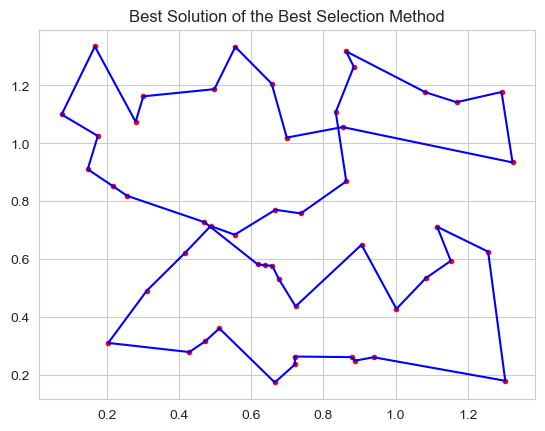

Worst Solution Path: Individual('i', [19, 10, 46, 45, 24, 48, 22, 41, 44, 33, 30, 6, 5, 32, 49, 26, 42, 38, 21, 29, 14, 43, 0, 15, 37, 11, 25, 3, 31, 18, 8, 36, 20, 1, 13, 39, 7, 9, 23, 35, 16, 47, 17, 34, 27, 2, 40, 28, 12, 4])


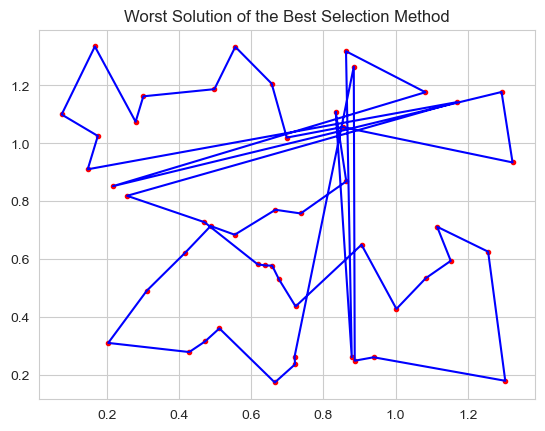

Random Solution Path: Individual('i', [19, 10, 46, 45, 24, 48, 22, 41, 44, 33, 30, 6, 5, 32, 49, 4, 42, 38, 21, 29, 14, 43, 0, 15, 37, 11, 25, 3, 31, 18, 8, 36, 40, 1, 13, 39, 7, 9, 23, 35, 16, 47, 17, 34, 27, 2, 20, 28, 12, 26])


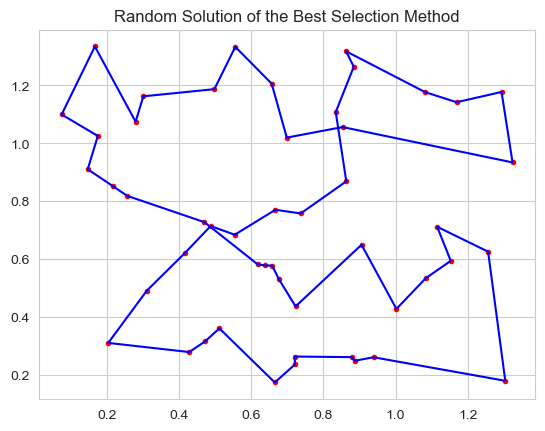

In [22]:
# Plotting the best solution of the best selection method
print("Best Solution Path:", best_best_solution)
plt.figure()
tsp.plotData(best_best_solution)
plt.title('Best Solution of the Best Selection Method')
plt.show()

# Plotting the worst solution of the best selection method
print("Worst Solution Path:", best_worst_solution)
plt.figure()
tsp.plotData(best_worst_solution)
plt.title('Worst Solution of the Best Selection Method')
plt.show()

# Plotting a random solution from the best population
random_solution = best_population[2]
print("Random Solution Path:", random_solution)
plt.figure()
tsp.plotData(random_solution)
plt.title('Random Solution of the Best Selection Method')
plt.show()

<h3 style="color:brown;">5.3.5 PLOTTING AVERAGE MIN AND MEAN FITNESS OVER GENERATIONS</h3>


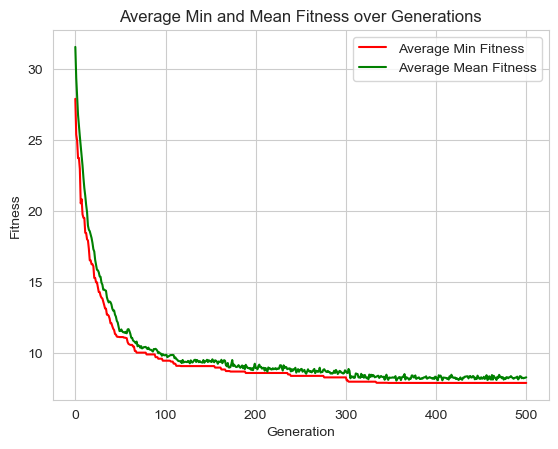

In [23]:
# Extracting min and mean fitness values from the best logbook
minFitnessValues, meanFitnessValues = best_logbook.select("min", "avg")

# Plotting the average min and mean fitness over generations for the best selection method
plt.figure()
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red', label='Average Min Fitness')
plt.plot(meanFitnessValues, color='green', label='Average Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Average Min and Mean Fitness over Generations')
plt.legend()
plt.show()


<h3 style="color:brown;">5.3.6 CONCLUSION FOR THIRD EXPERIMENT</h3>


Building upon the optimal parameters from previous experiments—population size of 150, 500 generations, a crossover probability of 0.9, and a mutation probability of 0.2—Experiment 3 aimed to identify the most effective selection strategy for the GA. The results from the different selection methods are summarized below:

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Selection Method</th>
    <th style="border: 1px solid black; padding: 8px;">Best Fitness (Run 10)</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Tournament</td>
    <td style="border: 1px solid black; padding: 8px;">7.925535202026367</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Roulette</td>
    <td style="border: 1px solid black; padding: 8px;">23.625730514526367</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Best</td>
    <td style="border: 1px solid black; padding: 8px;">21.41227149963379</td>
  </tr>
</table>


The results revealed that Tournament Selection emerged as the best selection method, achieving a best fitness value of 7.925535202026367. This represents an improvement of approximately 6.48% over the best fitness value of 8.47499942779541 achieved in Experiment 2. In contrast, the Roulette and Best selection methods resulted in significantly higher fitness values of 23.625730514526367 and 21.41227149963379, respectively. These higher fitness values indicate less optimal solutions, as the lower fitness value in this context represents better performance.

<h2 style="color:brown;">5.4 FOURTH EXPERIMENT</h2>


After determining the optimal selection method, the final experiment was conducted. In this experiment: 

- The impact of different crossover methods on the performance of the Genetic Algorithm was investigated.
- Each crossover method was evaluated over 10 runs to ensure consistent and reliable results.
- The crossover method that resulted in the best fitness value was identified.
- For the best crossover method, the best, worst, and a random solution were visualized. Additionally, the average minimum and mean fitness values over generations were plotted. 

The following crossover methods were tested:

- **Partially Matched Crossover (PMX)**: This method ensures that offspring are valid permutations of the parent chromosomes.
- **Ordered Crossover (OX)**: This method maintains the relative order of genes from the parent chromosomes in the offspring.

<h3 style="color:brown;">5.4.1 CONFIGURING GENETIC ALGORITHM PARAMETERS</h3>


In [24]:
# Setting static parameters based on the best combination found
POPULATION_SIZE = 150  # Using the optimal population size from previous experiments
MAX_GENERATIONS = 500  # Using the optimal number of generations from previous experiments
P_CROSSOVER = 0.9      # Using the optimal number of crossover probability from previous experiments
P_MUTATION = 0.2      # Using the optimal number of mutation probability from previous experiments
selection_method = tools.selTournament  # Using Tournament selection method
mutation_method = tools.mutShuffleIndexes  # Using the Shuffle Mutation method

# Defining crossover methods to test
crossover_methods = {
    "cxPartialyMatched": tools.cxPartialyMatched,  # Associating "cxPartialyMatched" with the Partial Matching Crossover method
    "cxOrdered": tools.cxOrdered                  # Associating "cxOrdered" with the Ordered Crossover method
}


<h3 style="color:brown;">5.4.2 RUNNING THE ALGORITHM</h3>


In [25]:
# Initializing variables to track the best results
best_combination = None
best_fitness = float('inf')  # Starting with an infinitely large value for the best fitness
best_logbook = None
best_best_solution = None
best_worst_solution = None
best_population = None

# Iterating over each crossover method defined
for cx_name, crossover_method in crossover_methods.items():
    # Printing the current crossover method and the fixed mutation method being used
    print(f"Running with Crossover Method: {cx_name} and Mutation Method: mutShuffleIndexes")

    # Preparing the statistics object to collect fitness values
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)  # Registering a function to compute the minimum fitness value
    stats.register("avg", np.mean) # Registering a function to compute the average fitness value

    # Creating a Hall of Fame to store the best individual found in this run
    hof = tools.HallOfFame(1)

    # Initializing lists to collect fitness values for this crossover method
    all_min_fitness = []
    all_mean_fitness = []

    num_runs = 10  # Defining the number of runs for each crossover method
    for run in range(num_runs):
        # Creating the initial population of individuals for this run
        population = toolbox.populationCreator(n=POPULATION_SIZE)

        # Registering the selection method with a tournament size of 10
        toolbox.register("select", selection_method, tournsize=10)

        # Registering the crossover and mutation methods
        toolbox.register("mate", crossover_method)  # Setting the current crossover method
        indpb = 1.0 / len(population[0])  # Calculating the mutation probability for each gene
        toolbox.register("mutate", mutation_method, indpb=indpb)  # Setting the mutation method

        # Running the genetic algorithm with the current settings
        population, logbook = algorithms.eaSimple(
            population,               # Starting with the initial population
            toolbox,                  # Using the toolbox with the registered methods
            cxpb=P_CROSSOVER,         # Setting the crossover probability
            mutpb=P_MUTATION,         # Setting the mutation probability
            ngen=MAX_GENERATIONS,     # Setting the number of generations
            stats=stats,              # Collecting statistics during the evolution process
            halloffame=hof,           # Storing the best individual found
            verbose=False             # Suppressing detailed output
        )
        
        # Selecting the best and worst individuals from the final population
        best_solution = tools.selBest(population, 1)[0]  # Selecting the individual with the best fitness
        worst_solution = tools.selWorst(population, 1)[0]  # Selecting the individual with the worst fitness

        # Collecting statistics from the logbook
        minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
        all_min_fitness.append(minFitnessValues)    # Adding minimum fitness values to the list
        all_mean_fitness.append(meanFitnessValues)  # Adding average fitness values to the list
        
        # Printing the best fitness value achieved in this run
        print(f"Run {run + 1} done with best fitness: {hof[0].fitness.values[0]}")
        
        # Checking if the best fitness from this run is the best so far
        if hof[0].fitness.values[0] < best_fitness:
            # Updating the best results with the current run's data
            best_fitness = hof[0].fitness.values[0]
            best_combination = cx_name  # Storing the current crossover method
            best_logbook = logbook
            best_best_solution = best_solution
            best_worst_solution = worst_solution
            best_population = population


Running with Crossover Method: cxPartialyMatched and Mutation Method: mutShuffleIndexes
Run 1 done with best fitness: 10.005989074707031
Run 2 done with best fitness: 10.005989074707031
Run 3 done with best fitness: 10.005989074707031
Run 4 done with best fitness: 10.005989074707031
Run 5 done with best fitness: 10.005989074707031
Run 6 done with best fitness: 10.005989074707031
Run 7 done with best fitness: 10.005989074707031
Run 8 done with best fitness: 10.005989074707031
Run 9 done with best fitness: 10.005989074707031
Run 10 done with best fitness: 10.005989074707031
Running with Crossover Method: cxOrdered and Mutation Method: mutShuffleIndexes
Run 1 done with best fitness: 10.175299644470215
Run 2 done with best fitness: 10.034995079040527
Run 3 done with best fitness: 9.316245079040527
Run 4 done with best fitness: 9.316245079040527
Run 5 done with best fitness: 9.316245079040527
Run 6 done with best fitness: 9.079612731933594
Run 7 done with best fitness: 9.079612731933594
Run

<h3 style="color:brown;">5.4.3 BEST COMBINATION</h3>



In [26]:
# Displaying the best combination
print(f"Best Crossover Method = {best_combination} with Best Fitness = {best_fitness}")

Best Crossover Method = cxOrdered with Best Fitness = 8.763583183288574


<h3 style="color:brown;">5.4.4 PLOTTING THE BEST, WORST, AND RANDOM SOLUTIONS</h3>


Best Solution Path: Individual('i', [19, 34, 10, 46, 24, 48, 8, 22, 3, 49, 32, 5, 42, 38, 4, 11, 25, 37, 14, 29, 43, 0, 15, 21, 27, 2, 20, 28, 26, 12, 17, 45, 31, 18, 6, 30, 33, 44, 41, 36, 40, 1, 39, 13, 9, 23, 7, 35, 16, 47])


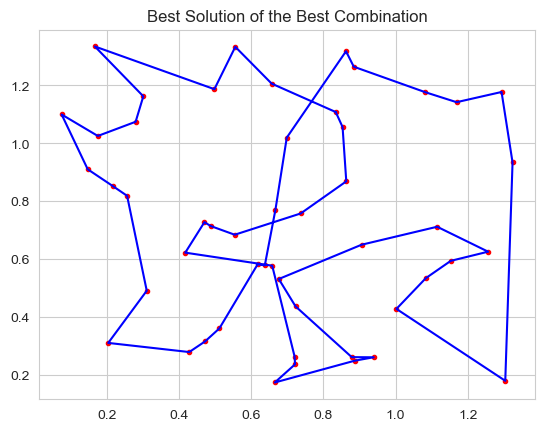

Worst Solution Path: Individual('i', [19, 34, 10, 46, 24, 48, 32, 22, 3, 49, 8, 28, 42, 38, 4, 11, 25, 37, 14, 29, 43, 0, 15, 21, 27, 2, 7, 5, 26, 12, 17, 45, 31, 18, 6, 30, 33, 44, 41, 36, 40, 1, 39, 13, 9, 23, 20, 35, 16, 47])


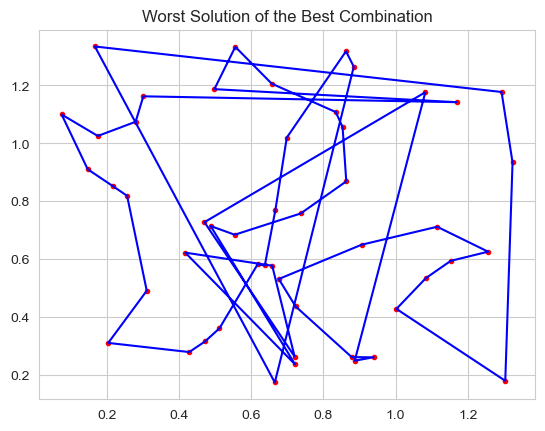

Random Solution Path: Individual('i', [19, 34, 10, 46, 24, 48, 8, 22, 3, 49, 32, 5, 42, 38, 4, 11, 25, 37, 14, 29, 43, 0, 15, 21, 27, 2, 20, 28, 26, 12, 17, 45, 31, 18, 6, 30, 33, 44, 41, 36, 40, 1, 39, 13, 9, 23, 7, 35, 16, 47])


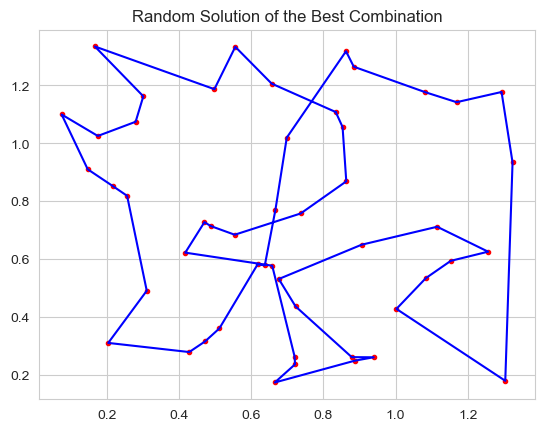

In [27]:
# Plotting the best solution of the best combination
print("Best Solution Path:", best_best_solution)
plt.figure()
tsp.plotData(best_best_solution)
plt.title('Best Solution of the Best Combination')
plt.show()

# Plotting the worst solution of the best combination
print("Worst Solution Path:", best_worst_solution)
plt.figure()
tsp.plotData(best_worst_solution)
plt.title('Worst Solution of the Best Combination')
plt.show()

# Plotting a random solution from the best population
random_solution = best_population[2]
print("Random Solution Path:", random_solution)
plt.figure()
tsp.plotData(random_solution)
plt.title('Random Solution of the Best Combination')
plt.show()

<h3 style="color:brown;">5.4.5 PLOTTING AVERAGE MIN AND MEAN FITNESS OVER GENERATIONS</h3>


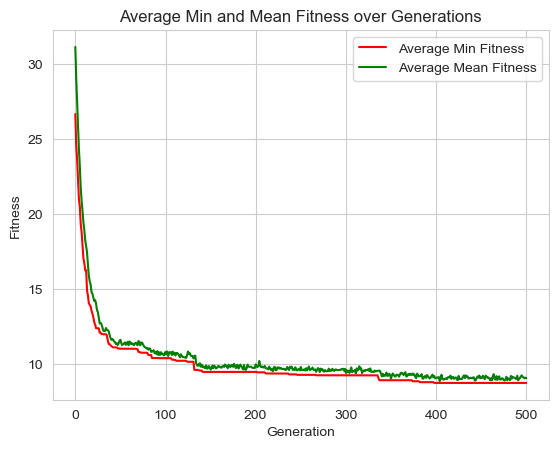

In [28]:
# Extracting min and mean fitness values from the best logbook
minFitnessValues, meanFitnessValues = best_logbook.select("min", "avg")

# Plotting the average min and mean fitness over generations for the best combination
plt.figure()
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red', label='Average Min Fitness')
plt.plot(meanFitnessValues, color='green', label='Average Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Average Min and Mean Fitness over Generations')
plt.legend()
plt.show()

<h3 style="color:brown;">5.4.6 CONCLUSION FOR FOURTH EXPERIMENT</h3>


Building on the optimal parameters identified in previous experiments—including a population size of 150, 500 generations, a crossover probability of 0.9, a mutation probability of 0.2, and the Tournament Selection method—Experiment 4 focused on exploring different crossover techniques to further enhance the GA's performance.

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Crossover Method</th>
    <th style="border: 1px solid black; padding: 8px;">Mutation Method</th>
    <th style="border: 1px solid black; padding: 8px;">Best Fitness (Run 10)</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">cxPartialyMatched</td>
    <td style="border: 1px solid black; padding: 8px;">mutShuffleIndexes</td>
    <td style="border: 1px solid black; padding: 8px;">10.005989074707031</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">cxOrdered</td>
    <td style="border: 1px solid black; padding: 8px;">mutShuffleIndexes</td>
    <td style="border: 1px solid black; padding: 8px;">8.763583183288574</td>
  </tr>
</table>


 The results revealed that the Ordered Crossover method achieved a best fitness value of 8.763583183288574. While this value is slightly higher than the 7.925535202026367 obtained in Experiment 3, it still demonstrates the effectiveness of the Ordered Crossover technique in exploring and exploiting the search space.


<h1 style="color:brown;">6. FINAL EXPERIMENT </h1>

After thoroughly investigating various parameters and methods in previous experiments, the final experiment was conducted on the complete problem set involving 200 cities. This final experiment aimed to integrate the best-performing configurations identified through the previous experiments to solve the given problem efficiently and effectively.

The following configurations, derived from previous experiments, were used in the final experiment:

- **Population Size**: 600 (three times the number of cities)
- **Maximum Generations**: 500
- **Crossover Probability**: 0.9
- **Mutation Probability**: 0.2
- **Selection Method**: Tournament Selection
- **Crossover Method**: Ordered Crossover (OX)
- **Mutation Method**: Shuffle Indexes Mutation

<h2 style="color:brown;">6.1 INITIALIZING THE TSP PROBLEM INSTANCE</h2>


In [29]:
# Defining the name of the TSP problem
TSP_NAME = "d200-14"  # Setting the name of the TSP problem to "d200-14"

# Creating an instance of the TravelingSalesmanProblem class with the specified name
tsp = TravelingSalesmanProblem(TSP_NAME)  

Number of cities = 200, Locations = [array([1.083879, 0.534726], dtype=float32), array([0.146797, 0.910582], dtype=float32), array([1.29368 , 1.177498], dtype=float32), array([0.658087, 0.577694], dtype=float32), array([0.878511, 0.261952], dtype=float32), array([0.665294, 0.174436], dtype=float32), array([0.511688, 0.361154], dtype=float32), array([0.166614, 1.334636], dtype=float32), array([0.470262, 0.727979], dtype=float32), array([0.279573, 1.074684], dtype=float32), array([0.863384, 0.868929], dtype=float32), array([0.722891, 0.437054], dtype=float32), array([0.862636, 1.318101], dtype=float32), array([0.174825, 1.025652], dtype=float32), array([1.115217, 0.712152], dtype=float32), array([1.002343, 0.428465], dtype=float32), array([0.555795, 1.333423], dtype=float32), array([0.698467, 1.019965], dtype=float32), array([0.61772 , 0.582407], dtype=float32), array([0.834183, 1.108248], dtype=float32), array([1.169078, 1.142261], dtype=float32), array([1.303985, 0.180227], dtype=float

<h2 style="color:brown;">6.2 CONFIGURING GENETIC ALGORITHM PARAMETERS</h2>


In [30]:
# Setting parameters based on the best combination found
POPULATION_SIZE = 600 # (three times the number of cities) 
MAX_GENERATIONS = 500
HALL_OF_FAME_SIZE = 30 
P_CROSSOVER = 0.9 
P_MUTATION = 0.2 

<h2 style="color:brown;">6.3 SETTING UP THE DEAP TOOLBOX AND GENETIC ALGORITHM COMPONENTS</h2>


In [31]:
# Creating a fitness class that aims to minimize the fitness value
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) 

# Creating an individual class that uses the FitnessMin class and stores individuals as arrays of integers
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin) 

# Defining a function to calculate the total distance for a given individual (path)
def tpsDistance(individual):
    return tsp.getTotalDistance(individual),  # Returning the total distance as a single-element tuple for compatibility with DEAP

# Setting up the toolbox for evolutionary algorithms
toolbox = base.Toolbox() 

# Registering a function to create a random permutation of city indices
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))  

# Registering a function to initialize an individual with a random order of citie
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)  

# Registering a function to create a population of individuals
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)  

# Registering a function to evaluate the fitness of individuals
toolbox.register("evaluate", tpsDistance) 

# Registering a function for selection using tournament selection with a tournament size of 10
toolbox.register("select", tools.selTournament, tournsize=10)  

# Registering a function for crossover using ordered crossover
toolbox.register("mate", tools.cxOrdered) 

# Registering a function for mutation using shuffle indexes
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))  

C:\Users\vedan\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\vedan\anaconda3\envs\comp815\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


<h2 style="color:brown;">6.4 RUNNING THE ALGORITHM</h2>


In [32]:
# Preparing the statistics object to collect fitness values
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)  # Registering a function to compute the minimum fitness value
stats.register("avg", np.mean) # Registering a function to compute the average fitness value

# Creating a Hall of Fame to store the best individual found in the runs
hof = tools.HallOfFame(1)

# Initializing lists to store fitness values and distances
all_min_fitness = []
all_mean_fitness = []
all_best_distances = []
all_worst_distances = []

num_runs = 10  # Defining the number of runs for the genetic algorithm
for run in range(num_runs):
    # Creating the initial population of individuals for this run
    population = toolbox.populationCreator(n=POPULATION_SIZE)
    
    # Running the genetic algorithm with the current parameters and Hall of Fame
    population, logbook = algorithms.eaSimple(
        population,               # Starting with the initial population
        toolbox,                  # Using the toolbox with the registered methods
        cxpb=P_CROSSOVER,         # Setting the crossover probability
        mutpb=P_MUTATION,         # Setting the mutation probability
        ngen=MAX_GENERATIONS,     # Setting the number of generations
        stats=stats,              # Collecting statistics during the evolution process
        halloffame=hof,           # Storing the best individual found
        verbose=False             # Suppressing detailed output
    )
    
    # Selecting the best and worst individuals from the final population
    best_solution = tools.selBest(population, 1)[0]  # Selecting the individual with the best fitness
    worst_solution = tools.selWorst(population, 1)[0]  # Selecting the individual with the worst fitness

    # Computing the distances for the best and worst solutions
    best_distance = tsp.getTotalDistance(best_solution)  # Calculating the total distance for the best solution
    worst_distance = tsp.getTotalDistance(worst_solution)  # Calculating the total distance for the worst solution
    
    # Collecting distances
    all_best_distances.append(best_distance)  # Adding the best distance to the list
    all_worst_distances.append(worst_distance)  # Adding the worst distance to the list

    # Collecting fitness statistics
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    all_min_fitness.append(minFitnessValues)    # Adding minimum fitness values to the list
    all_mean_fitness.append(meanFitnessValues)  # Adding average fitness values to the list
    
    # Printing the best fitness of this run
    print(f"Run {run + 1} done with best fitness: {hof[0].fitness.values[0]}")

    # Storing the results of the last run for plotting
    if run == num_runs - 1:
        last_population = population
        last_best_solution = best_solution
        last_worst_solution = worst_solution


Run 1 done with best fitness: 22.254587173461914
Run 2 done with best fitness: 22.25331687927246
Run 3 done with best fitness: 22.25331687927246
Run 4 done with best fitness: 22.25331687927246
Run 5 done with best fitness: 21.610855102539062
Run 6 done with best fitness: 20.383848190307617
Run 7 done with best fitness: 20.383848190307617
Run 8 done with best fitness: 20.383848190307617
Run 9 done with best fitness: 20.383848190307617
Run 10 done with best fitness: 20.383848190307617


<h2 style="color:brown;">6.5 PLOTTING THE BEST, WORST, AND RANDOM SOLUTIONS</h2>


Best Solution Path: Individual('i', [144, 99, 140, 24, 155, 146, 101, 142, 103, 164, 176, 127, 197, 113, 117, 77, 122, 143, 8, 180, 109, 22, 120, 48, 135, 53, 112, 194, 121, 162, 65, 69, 156, 67, 134, 151, 152, 163, 118, 154, 153, 130, 102, 25, 167, 174, 148, 11, 108, 157, 61, 171, 150, 136, 192, 52, 93, 88, 47, 35, 91, 137, 36, 40, 1, 39, 72, 7, 95, 23, 13, 80, 189, 75, 147, 111, 41, 6, 45, 198, 186, 46, 161, 166, 116, 73, 78, 54, 9, 81, 133, 138, 141, 168, 173, 129, 49, 55, 57, 183, 66, 188, 5, 123, 119, 74, 92, 114, 196, 33, 97, 30, 175, 51, 4, 42, 70, 38, 21, 82, 10, 34, 19, 64, 26, 12, 16, 68, 58, 17, 125, 187, 110, 169, 182, 84, 132, 193, 62, 190, 124, 179, 44, 131, 94, 149, 100, 85, 32, 63, 71, 96, 29, 50, 76, 60, 43, 89, 90, 185, 159, 106, 195, 0, 98, 15, 145, 184, 104, 105, 178, 172, 160, 56, 181, 158, 18, 31, 139, 199, 28, 20, 87, 2, 83, 59, 79, 27, 86, 14, 165, 37, 191, 115, 3, 107, 126, 170, 177, 128])


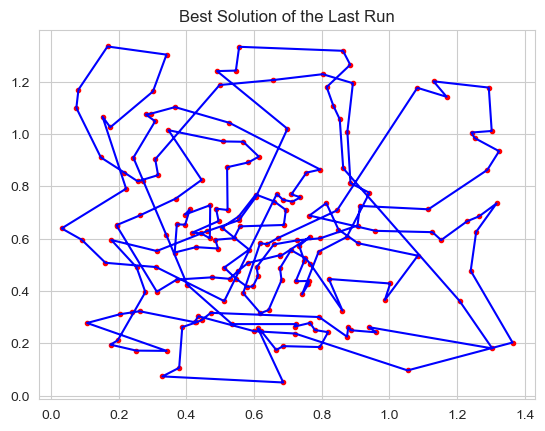

Worst Solution Path: Individual('i', [128, 144, 99, 140, 24, 155, 146, 101, 142, 103, 38, 176, 127, 197, 113, 117, 77, 122, 143, 8, 180, 109, 22, 120, 48, 135, 53, 112, 194, 121, 162, 65, 69, 156, 67, 134, 151, 152, 163, 118, 154, 153, 130, 102, 25, 167, 174, 148, 11, 108, 157, 61, 171, 150, 136, 192, 52, 93, 88, 47, 35, 91, 168, 36, 40, 147, 39, 72, 7, 95, 23, 13, 80, 189, 75, 1, 41, 6, 45, 198, 186, 46, 161, 166, 116, 73, 78, 54, 9, 81, 133, 138, 141, 137, 173, 129, 49, 34, 57, 183, 66, 188, 5, 123, 119, 74, 92, 114, 196, 33, 97, 30, 175, 51, 4, 42, 70, 164, 21, 82, 10, 55, 19, 64, 26, 12, 16, 68, 58, 17, 125, 187, 110, 169, 182, 111, 84, 132, 193, 62, 190, 124, 179, 44, 131, 94, 149, 100, 85, 32, 63, 71, 96, 29, 50, 76, 60, 43, 89, 90, 185, 159, 106, 195, 0, 98, 15, 145, 184, 104, 105, 178, 172, 160, 56, 181, 158, 18, 31, 139, 199, 28, 20, 87, 2, 83, 59, 79, 27, 86, 14, 165, 37, 191, 115, 3, 107, 126, 170, 177])


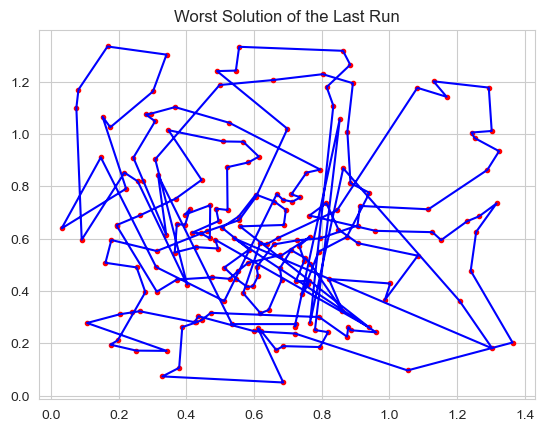

Random Solution Path: Individual('i', [128, 144, 99, 140, 24, 155, 146, 101, 142, 103, 164, 176, 127, 197, 113, 117, 77, 122, 143, 8, 180, 109, 22, 120, 48, 135, 53, 112, 194, 121, 162, 65, 69, 156, 67, 134, 151, 152, 163, 118, 154, 153, 130, 102, 25, 167, 174, 148, 11, 108, 157, 61, 171, 150, 136, 192, 52, 93, 88, 47, 35, 91, 137, 36, 40, 1, 39, 72, 7, 95, 23, 13, 80, 189, 75, 147, 41, 6, 45, 198, 186, 46, 161, 166, 116, 73, 78, 54, 9, 81, 133, 138, 141, 168, 173, 129, 49, 55, 57, 183, 66, 188, 5, 123, 119, 74, 92, 114, 196, 33, 97, 30, 175, 51, 4, 42, 70, 38, 21, 82, 10, 34, 19, 64, 26, 12, 16, 68, 58, 17, 125, 187, 110, 169, 182, 111, 84, 132, 193, 62, 190, 124, 179, 44, 131, 94, 149, 100, 85, 32, 63, 71, 96, 29, 50, 76, 60, 43, 89, 90, 185, 159, 106, 195, 0, 98, 15, 145, 184, 104, 105, 178, 172, 160, 56, 181, 158, 18, 31, 139, 199, 28, 20, 87, 2, 83, 59, 79, 27, 86, 14, 165, 37, 191, 115, 3, 107, 126, 170, 177])


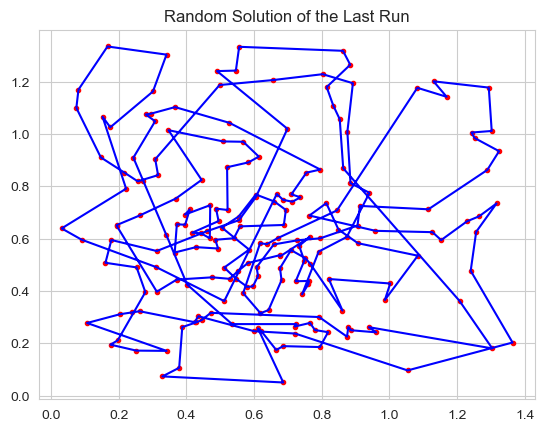

In [33]:
# Plotting the best solution of the last run
print("Best Solution Path:", last_best_solution)
plt.figure()
tsp.plotData(last_best_solution)
plt.title('Best Solution of the Last Run')
plt.show()

# Plotting the worst solution of the last run
print("Worst Solution Path:", last_worst_solution)
plt.figure()
tsp.plotData(last_worst_solution)
plt.title('Worst Solution of the Last Run')
plt.show()

# Plotting a random solution from the last population
random_solution = last_population[2]
print("Random Solution Path:", random_solution)
plt.figure()
tsp.plotData(random_solution)
plt.title('Random Solution of the Last Run')
plt.show()

<h2 style="color:brown;">6.6 PLOTTING AVERAGE MIN AND MEAN FITNESS OVER GENERATIONS</h2>


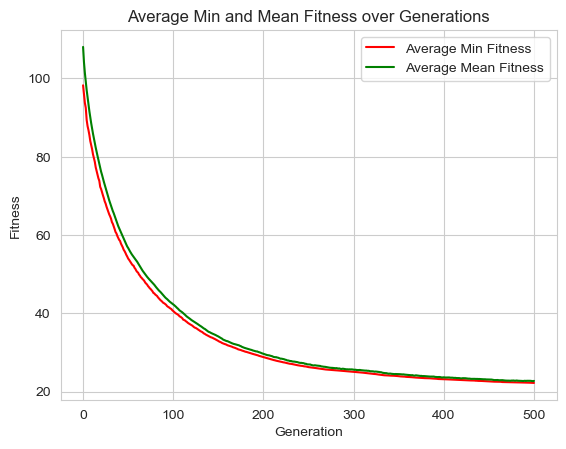

In [34]:
# Calculating the average min and mean fitness across all runs
avg_min_fitness = np.mean(all_min_fitness, axis=0)
avg_mean_fitness = np.mean(all_mean_fitness, axis=0)

# Plotting the average min and mean fitness over generations
plt.figure()
sns.set_style("whitegrid")
plt.plot(avg_min_fitness, color='red', label='Average Min Fitness')
plt.plot(avg_mean_fitness, color='green', label='Average Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Average Min and Mean Fitness over Generations')
plt.legend()
plt.show()

<h2 style="color:brown;">6.7 ANALYSIS OF DISTANCE IMPROVEMENTS FROM WORST TO BEST PATHS</h2>


In [35]:
# Checking if there are any worst distances recorded
if all_worst_distances:
    # Calculating percentage improvements by comparing worst and best distances
    percentage_improvements = [
        (w - b) / w * 100 for w, b in zip(all_worst_distances, all_best_distances)
    ]
    # Calculating the average percentage improvement
    avg_percentage_improvement = np.mean(percentage_improvements)
    
    # Retrieving the total distances of the final best and worst paths
    total_best_distance = all_best_distances[-1]  # Getting the distance of the final best path
    total_worst_distance = all_worst_distances[-1]  # Getting the distance of the final worst path
    
    # Printing the total distance of the final best path
    print(f"Total distance of the final best path: {total_best_distance}")
    # Printing the total distance of the final worst path
    print(f"Total distance of the final worst path: {total_worst_distance}")
    # Printing the average percentage improvement from worst to best path
    print(f"Average percentage improvement of best path over worst path: {avg_percentage_improvement:.2f}%")


Total distance of the final best path: 23.189985275268555
Total distance of the final worst path: 30.11847686767578
Average percentage improvement of best path over worst path: 29.46%


<h2 style="color:brown;">6.8 CONCLUSION FOR FINAL EXPERIMENT</h2>


In the final experiment, the optimal parameters found from previous experiments were applied to the TSP with 200 cities. The configurations used included a population size of 600 (three times the number of cities), a maximum of 500 generations, a crossover probability of 0.9, a mutation probability of 0.2, Tournament Selection, Ordered Crossover (OX), and Shuffle Indexes Mutation.

The results showed that the best fitness values across the ten runs ranged from 20.383848190307617 to 22.254587173461914. Specifically, Runs 6 through 10 consistently achieved a best fitness value of 20.383848190307617. The following table summarizes the best fitness values obtained across the ten runs: 

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Run</th>
    <th style="border: 1px solid black; padding: 8px;">Best Fitness</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 1</td>
    <td style="border: 1px solid black; padding: 8px;">22.254587173461914</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 2</td>
    <td style="border: 1px solid black; padding: 8px;">22.25331687927246</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 3</td>
    <td style="border: 1px solid black; padding: 8px;">22.25331687927246</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 4</td>
    <td style="border: 1px solid black; padding: 8px;">22.25331687927246</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 5</td>
    <td style="border: 1px solid black; padding: 8px;">21.610855102539062</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 6</td>
    <td style="border: 1px solid black; padding: 8px;">20.383848190307617</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 7</td>
    <td style="border: 1px solid black; padding: 8px;">20.383848190307617</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 8</td>
    <td style="border: 1px solid black; padding: 8px;">20.383848190307617</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 9</td>
    <td style="border: 1px solid black; padding: 8px;">20.383848190307617</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Run 10</td>
    <td style="border: 1px solid black; padding: 8px;">20.383848190307617</td>
  </tr>
</table>


Overall, the experiment confirms that the selected parameters provided a robust solution for the 200-city problem. The significant improvement in the best path distance over the worst path highlights the efficacy of the applied settings for addressing the given TSP scenario.

<h1 style="color:brown;">7. CONCLUSION</h1>


The series of experiments conducted on the Genetic Algorithm for solving the Traveling Salesman Problem showcased significant enhancements in performance through systematic optimization of parameters and methods.

The initial design, utilizing arbitrary parameters, yielded a baseline fitness value of 12.63312816619873. This served as the starting point for subsequent refinements. Experiment 1 identified that a population size of 150 (three times the number of cities) and 500 generations were optimal. This adjustment resulted in a notable performance improvement, with the fitness value increasing to 8.99872875213623, reflecting an approximate improvement of 28.76% compared to the initial design.

Experiment 2 further refined the GA by optimizing crossover and mutation probabilities. The best combination led to a fitness value of 8.47499942779541, marking a 5.83% improvement over Experiment 1. Following this, Experiment 3 explored different selection methods. Tournament Selection emerged as the most effective, achieving a fitness value of 7.925535202026367. This result represented a 6.48% improvement compared to Experiment 2.

In Experiment 4, various crossover methods were tested to explore further refinements. The Ordered Crossover method provided the best performance, achieving a fitness value of 8.763583183288574. Although this value was slightly higher than the 7.925535202026367 from Experiment 3, it demonstrated an improvement over the 10.005989074707031 achieved with the Partially Matched Crossover method. When compared to the initial arbitrary design, the fitness value improved from 12.63312816619873 to 8.763583183288574, representing an overall improvement of approximately 30.63%.


**Summary of Results**

<table style="width:100%; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid black; padding: 8px;">Experiment</th>
    <th style="border: 1px solid black; padding: 8px;">Best Fitness Value</th>
    <th style="border: 1px solid black; padding: 8px;">Improvement (%)</th>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Initial Design</td>
    <td style="border: 1px solid black; padding: 8px;">12.63312816619873</td>
    <td style="border: 1px solid black; padding: 8px;">-</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Experiment 1</td>
    <td style="border: 1px solid black; padding: 8px;">8.99872875213623</td>
    <td style="border: 1px solid black; padding: 8px;">28.76% compared to Initial Design</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Experiment 2</td>
    <td style="border: 1px solid black; padding: 8px;">8.47499942779541</td>
    <td style="border: 1px solid black; padding: 8px;">5.83% compared to Experiment 1</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Experiment 3</td>
    <td style="border: 1px solid black; padding: 8px;">7.925535202026367</td>
    <td style="border: 1px solid black; padding: 8px;">6.48% compared to Experiment 2</td>
  </tr>
  <tr>
    <td style="border: 1px solid black; padding: 8px;">Experiment 4</td>
    <td style="border: 1px solid black; padding: 8px;">8.763583183288574</td>
    <td style="border: 1px solid black; padding: 8px;">30.63% compared to Initial Design</td>
  </tr>
</table>

The final experiment applied the optimized configurations to the 200-city TSP. Results demonstrated consistent and reliable performance across multiple runs, with an average percentage improvement of 29.46% of the best path over the worst path. This significant enhancement underscores the effectiveness of the GA in addressing complex TSP instances.

In conclusion, the series of experiments highlighted the GA's capacity for effectively solving the TSP. The optimization of parameters and methods led to substantial performance improvements, demonstrating the GA's robustness and efficiency in handling large-scale problems and providing high-quality solutions for complex routing challenges.